In [12]:

import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)
random.seed(42)

In [13]:
# Create  dataset
student_ids = ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009', 'S010']
names = ['Student_1', 'Student_2', 'Student_3', 'Student_4', 'Student_5', 'Student_6', 'Student_7', 'Student_8', 'Student_9', 'Student_10']
ages = [18, 19, 20, 21, 18, 17, 19, 20, 22, 23]
genders = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']
math_scores = [85, 90, 78, 88, np.nan, 95, 70, 80, 75, 68]
science_scores = [72, 85, 80, 95, 60, 78, np.nan, 88, 91, 85]
english_scores = [80, 72, 75, 85, 78, 92, 70, 88, 89, 74]
attendance_rates = [90.0, 85.0, 95.0, np.nan, 92.0, 91.0, 89.0, 88.0, 94.0, 90.0]
study_hours = [15, 10, 12, 8, 7, 5, 20, 16, 18, 25]

# Create DataFrame
df = pd.DataFrame({
    'Student_ID': student_ids,
    'Name': names,
    'Age': ages,
    'Gender': genders,
    'Math_Score': math_scores,
    'Science_Score': science_scores,
    'English_Score': english_scores,
    'Attendance_Rate': attendance_rates,
    'Study_Hours': study_hours
})

In [14]:
#  Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Handle missing values 
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].mean())
df['Science_Score'] = df['Science_Score'].fillna(df['Science_Score'].mean())
df['Attendance_Rate'] = df['Attendance_Rate'].fillna(df['Attendance_Rate'].mean())




Missing Values:
 Student_ID         0
Name               0
Age                0
Gender             0
Math_Score         1
Science_Score      1
English_Score      0
Attendance_Rate    1
Study_Hours        0
dtype: int64


In [15]:
def detect_and_cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] > upper_bound, upper_bound, np.where(data[column] < lower_bound, lower_bound, data[column]))
    return data

numeric_columns = ['Math_Score', 'Science_Score', 'English_Score', 'Study_Hours']
for col in numeric_columns:
     df = detect_and_cap_outliers(df, col)

In [16]:
df.head()


,Student_ID,Name,Age,Gender,Math_Score,Science_Score,English_Score,Attendance_Rate,Study_Hours
0,S001,Student_1,18,M,85.0,72.000,80.0,90.000000,15.0
1,S002,Student_2,19,F,90.0,85.000,72.0,85.000000,10.0
2,S003,Student_3,20,M,78.0,80.000,75.0,95.000000,12.0
3,S004,Student_4,21,F,88.0,95.000,85.0,90.444444,8.0
4,S005,Student_5,18,M,81.0,65.375,78.0,92.000000,7.0


In [17]:
df['Study_Hours_Log'] = np.log(df['Study_Hours'] + 1)
print("Final DataFrame after handling missing values, outliers, and transformation:\n", df)

Final DataFrame after handling missing values, outliers, and transformation:
   Student_ID        Name  Age Gender  Math_Score  Science_Score  \
0       S001   Student_1   18      M        85.0      72.000000   
1       S002   Student_2   19      F        90.0      85.000000   
2       S003   Student_3   20      M        78.0      80.000000   
3       S004   Student_4   21      F        88.0      95.000000   
4       S005   Student_5   18      M        81.0      65.375000   
5       S006   Student_6   17      F        95.0      78.000000   
6       S007   Student_7   19      M        70.0      81.555556   
7       S008   Student_8   20      F        80.0      88.000000   
8       S009   Student_9   22      M        75.0      91.000000   
9       S010  Student_10   23      F        68.0      85.000000   

   English_Score  Attendance_Rate  Study_Hours  Study_Hours_Log  
0           80.0        90.000000         15.0         2.772589  
1           72.0        85.000000         10.0      

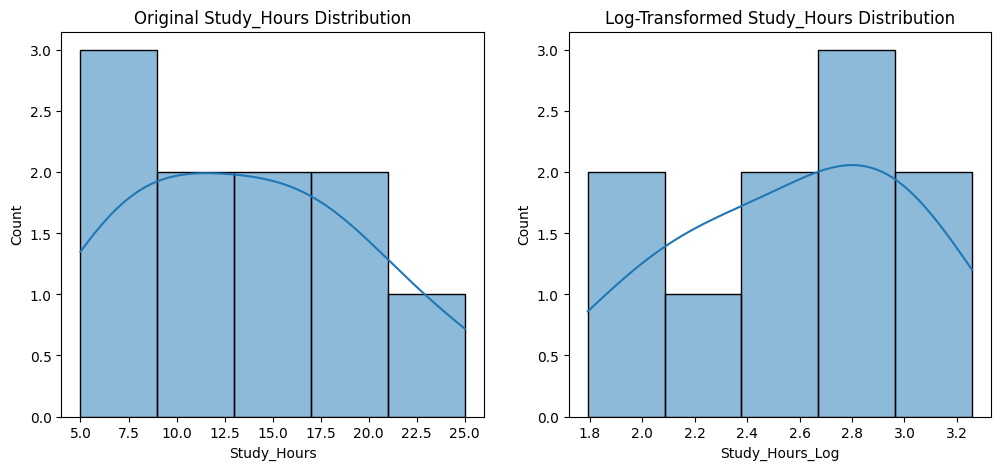

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Before transformation
plt.subplot(1, 2, 1)
sns.histplot(df['Study_Hours'], kde=True)
plt.title('Original Study_Hours Distribution')

# After transformation
plt.subplot(1, 2, 2)
sns.histplot(df['Study_Hours_Log'], kde=True)
plt.title('Log-Transformed Study_Hours Distribution')
plt.show()


In [21]:
scaler = MinMaxScaler()
df['Study_Hours_MinMax'] = scaler.fit_transform(df[['Study_Hours']])
print(df.head())

  Student_ID       Name  Age Gender  Math_Score  Science_Score  English_Score  \
0       S001  Student_1   18      M        85.0         72.000           80.0   
1       S002  Student_2   19      F        90.0         85.000           72.0   
2       S003  Student_3   20      M        78.0         80.000           75.0   
3       S004  Student_4   21      F        88.0         95.000           85.0   
4       S005  Student_5   18      M        81.0         65.375           78.0   

   Attendance_Rate  Study_Hours  Study_Hours_Log  Study_Hours_MinMax  
0        90.000000         15.0         2.772589                0.50  
1        85.000000         10.0         2.397895                0.25  
2        95.000000         12.0         2.564949                0.35  
3        90.444444          8.0         2.197225                0.15  
4        92.000000          7.0         2.079442                0.10  
